In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
import pandas as pd
  
df = pd.read_csv("/content/drive/MyDrive/NYC Taxi Data.csv")


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1458644, 11)

In [ ]:
df['pickup_longitude']= df['pickup_longitude'].apply(pd.to_numeric)  
df.dtypes 
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Univariate Analysis

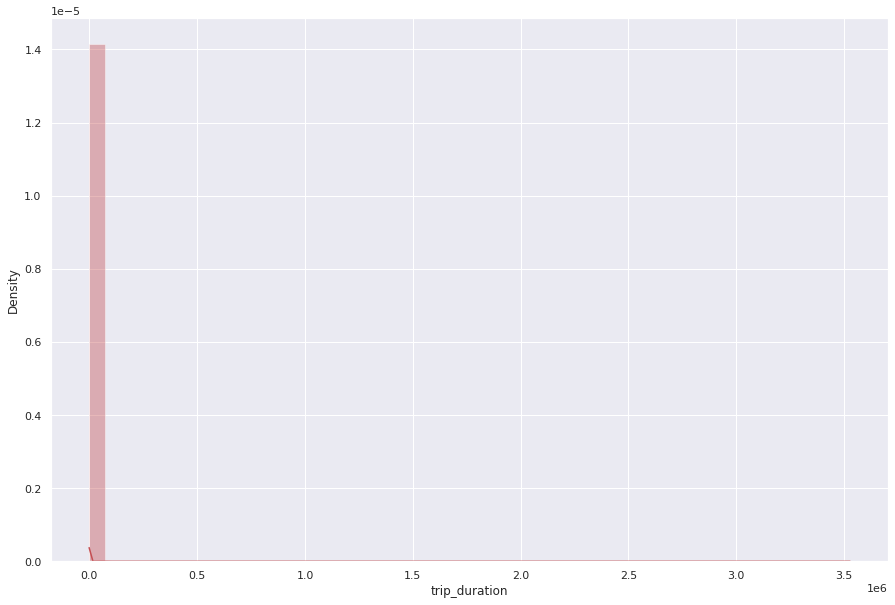

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(15,10))
sns.distplot(df['trip_duration'],color="r")

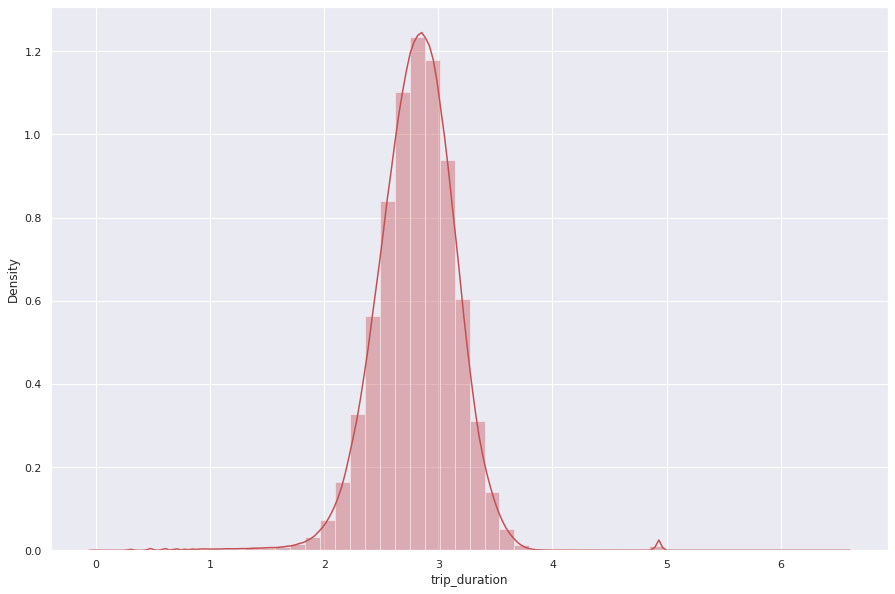

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['trip_duration']),color="R")

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [ ]:
sns.countplot(x='passenger_count',data=df)

NameError: ignored

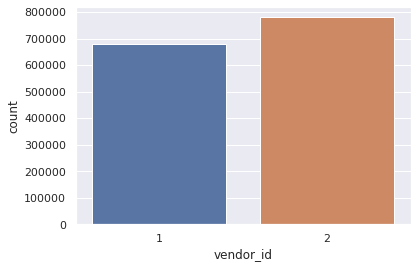

In [ ]:
sns.countplot(x='vendor_id',data=df)

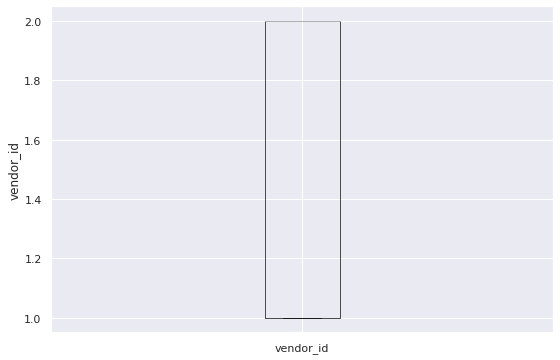

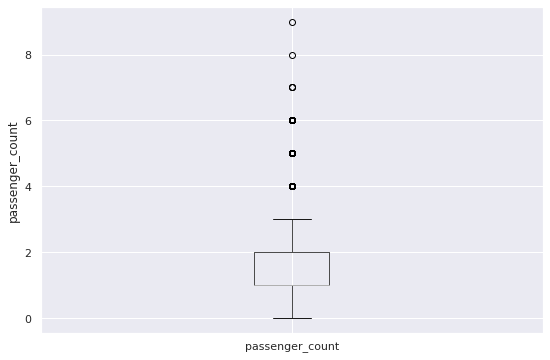

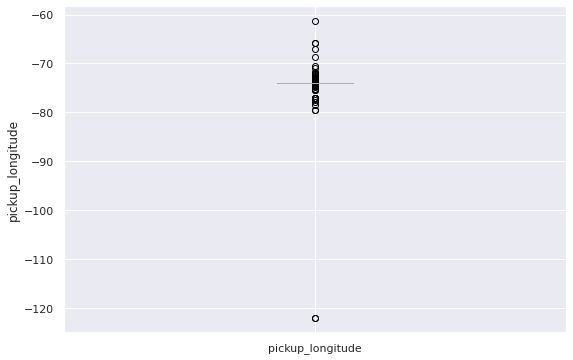

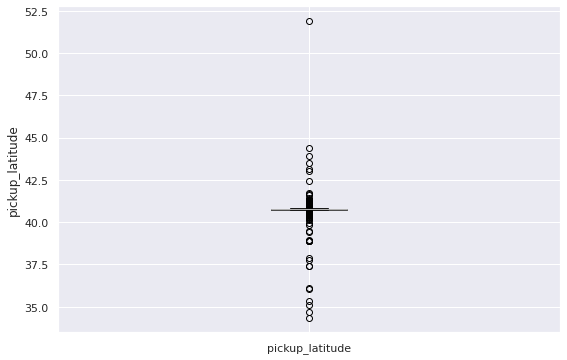

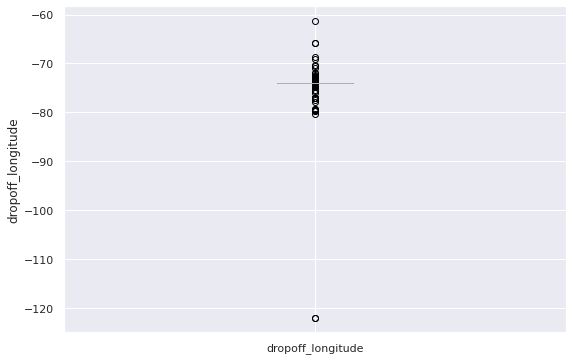

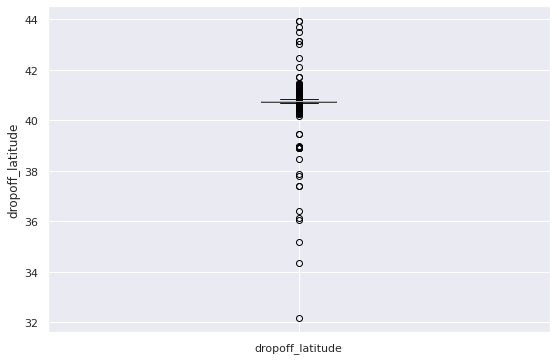

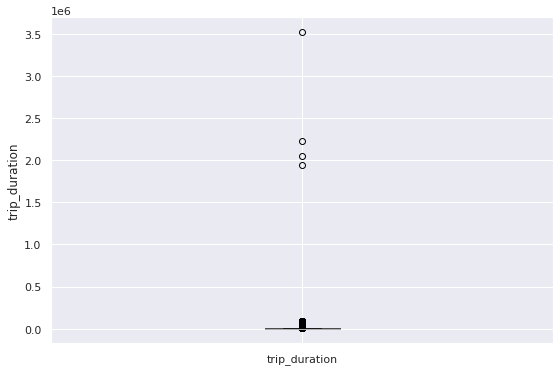

In [ ]:
# plot a boxplot for the label by each numerical feature  
for col in df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

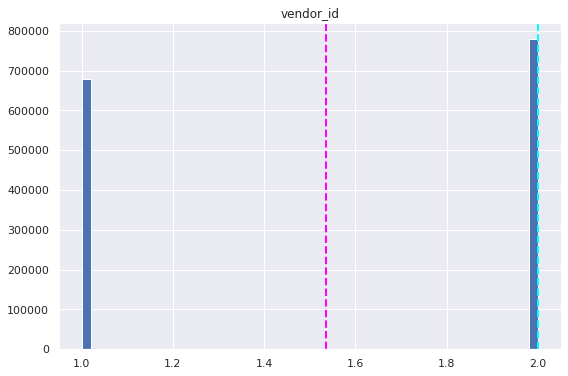

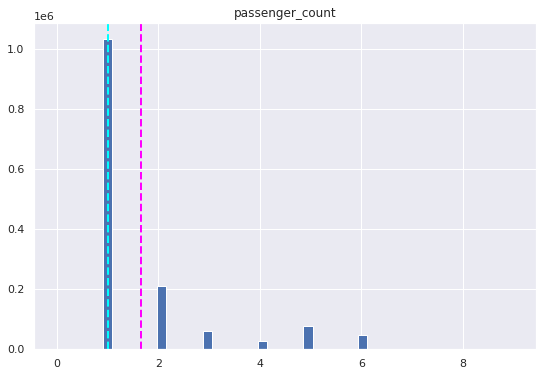

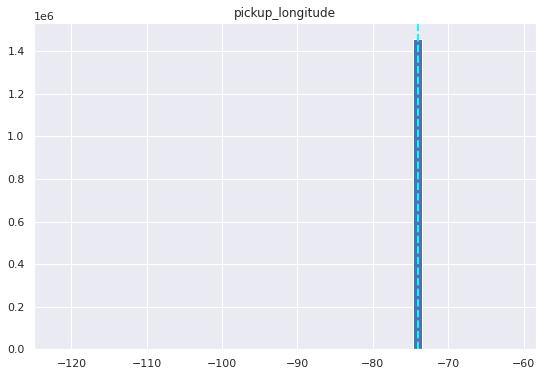

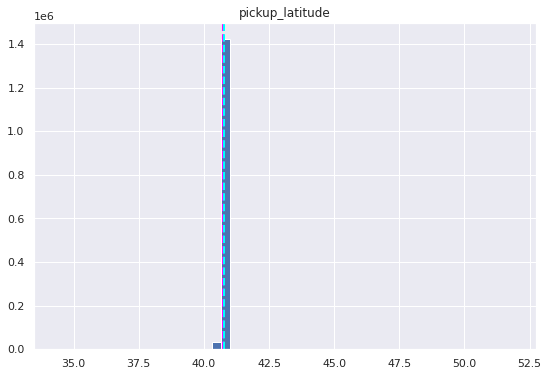

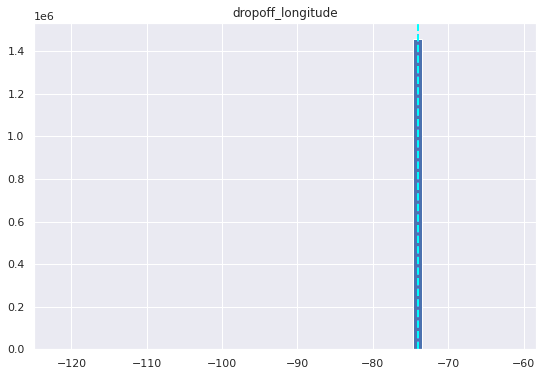

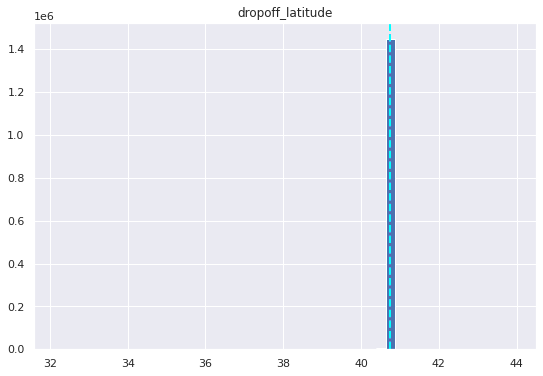

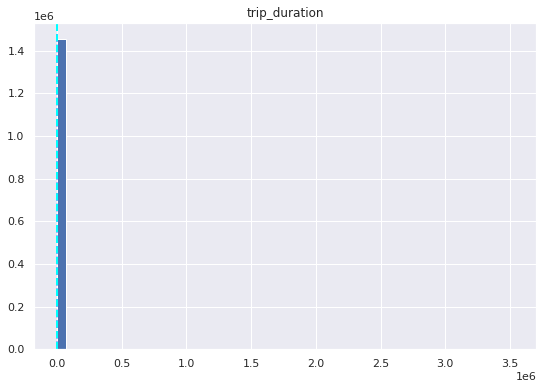

In [ ]:
# plot a bar plot for each numerical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

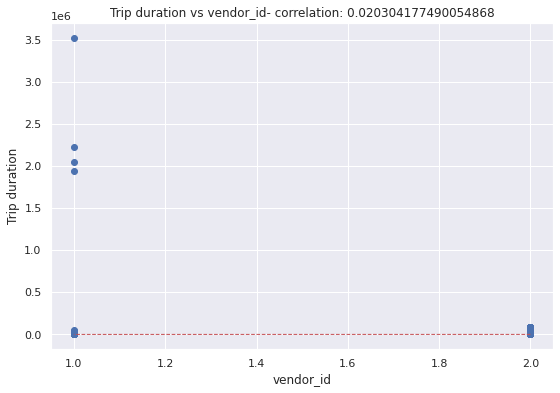

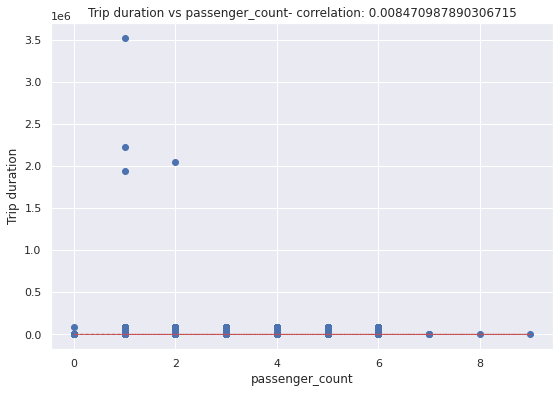

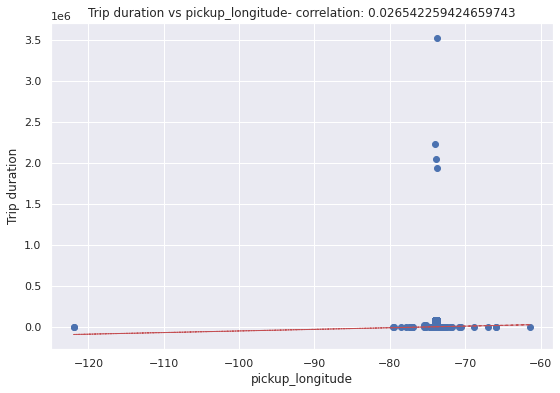

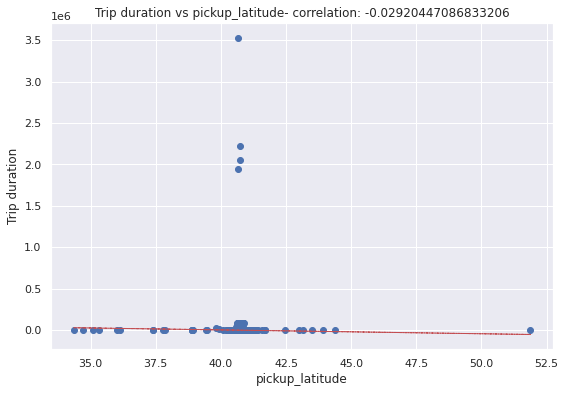

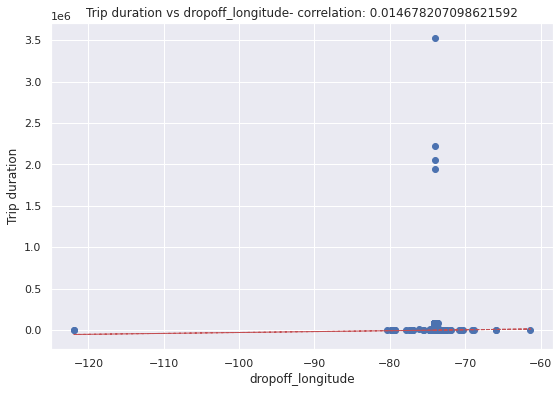

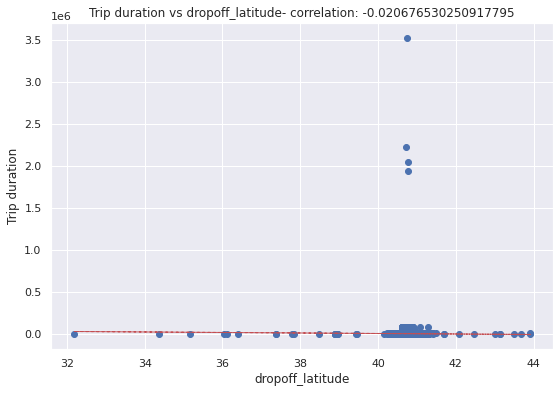

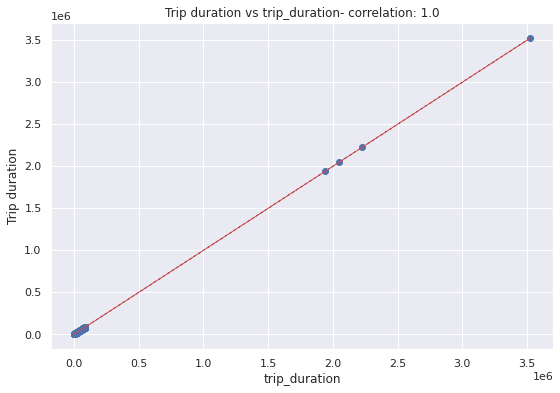

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['trip_duration'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
#So we know we have a longitude and latitude present so we will work on it to make a new feature that is distance.
#So making a new distance column from the latitude and longitude

In [ ]:

from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [ ]:
df["distance"] = df.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

df['drop_hour'] = df['dropoff_datetime'].dt.hour
df=df.drop(['dropoff_datetime', 'pickup_datetime'], axis = 1)
df.head()


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,pickup_month,pickup_weekday,pickup_hour,drop_hour
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,14,3,0,17,17
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,12,6,6,0,0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,19,1,1,11,12
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,6,4,2,19,19
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,26,3,5,13,13


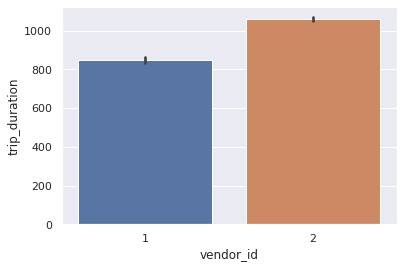

In [ ]:
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

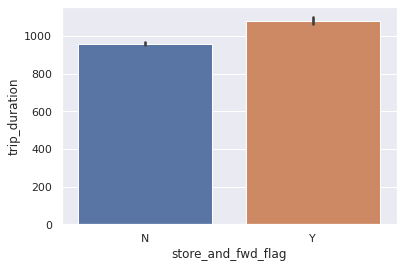

In [ ]:
sns.barplot(y='trip_duration',x='store_and_fwd_flag',data=df,estimator=np.mean)

In [ ]:
sns.barplot(y='trip_duration',x='passenger_count',data=df,estimator=np.mean)

In [ ]:
sns.lineplot(x='pickup_hour', y='trip_duration',data=df)

In [ ]:
sns.lineplot(x='pickup_day', y='trip_duration',data=df)

In [ ]:
df.describe()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
      

# creating dummies for gender
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N':0, 'Y':1})
# the independent variables set
X = df[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance',
       'pickup_day', 'pickup_month', 'pickup_weekday', 'pickup_hour',
       'drop_hour', 'store_and_fwd_flag']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature           VIF
0            vendor_id  1.148455e+01
1      passenger_count  2.840969e+00
2     pickup_longitude  2.932510e+06
3      pickup_latitude  1.682329e+06
4    dropoff_longitude  2.736433e+06
5     dropoff_latitude  1.477370e+06
6             distance  1.712970e+00
7           pickup_day  4.174785e+00
8         pickup_month  5.380902e+00
9       pickup_weekday  3.471264e+00
10         pickup_hour  4.324578e+01
11           drop_hour  4.235069e+01
12  store_and_fwd_flag  1.012789e+00


In [ ]:
df['trip_duration_hour']=df['trip_duration']/3600
df=df.drop('trip_duration' , axis=1)
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day,pickup_month,pickup_weekday,pickup_hour,drop_hour,trip_duration_hour
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1.498991,14,3,0,17,17,0.126389
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1.806074,12,6,6,0,0,0.184167
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,6.387103,19,1,1,11,12,0.590000
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1.485965,6,4,2,19,19,0.119167
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,1.188962,26,3,5,13,13,0.120833


Outlier removal


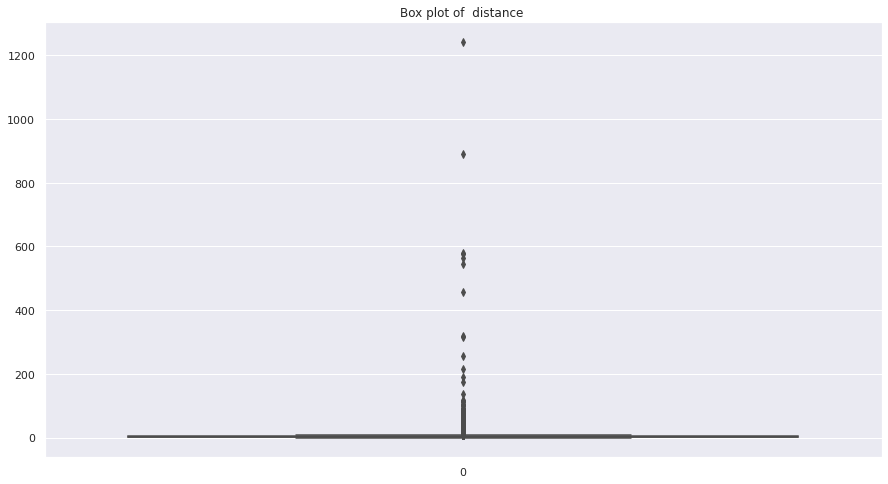

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=df['distance'], orient="v")


In [ ]:
percentile_q1 = np.percentile(df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['distance'],75)
print(percentile_q3)

1.23222326737417
2.0943743977620386
3.8765539736919856


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.734272792102554
Upper limit for outlier  : 7.843050033168709


In [ ]:
df=df[df['distance']>lower_limit_outlier]
df=df[df['distance']<upper_limit_outlier]

In [ ]:
df.shape

(1317971, 15)

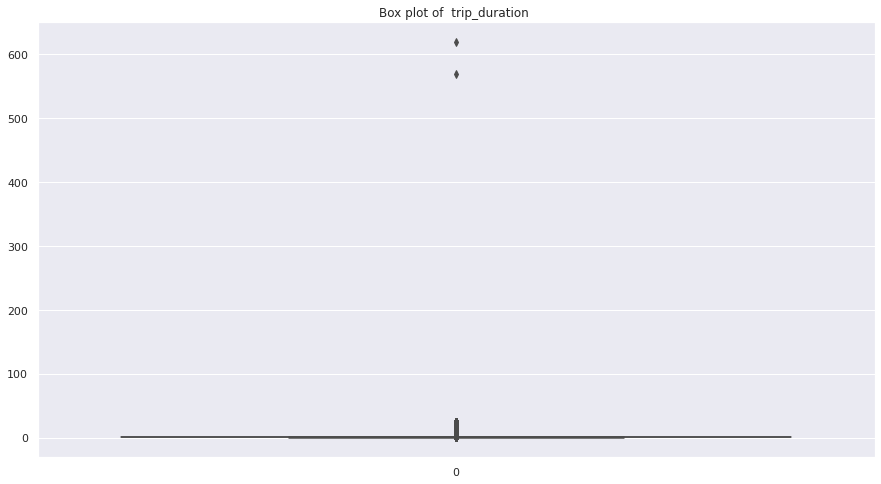

In [ ]:
#remove the outlier present in trip_duration

plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=df['trip_duration_hour'], orient="v")

In [ ]:
percentile_q1_trip_duration = np.percentile(df['trip_duration_hour'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(df['trip_duration_hour'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(df['trip_duration_hour'],75)
print(percentile_q3_trip_duration)


iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr
print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

0.10361111111111111
0.16805555555555557
0.2586111111111111
lower limit for outlier  : -0.12888888888888894
Upper limit for outlier  : 0.49111111111111116


In [ ]:
df=df[df['trip_duration_hour']>lower_limit_outlier_trip_duration]
df=df[df['trip_duration_hour']<upper_limit_outlier_trip_duration]

In [ ]:
df.shape

(1277506, 15)

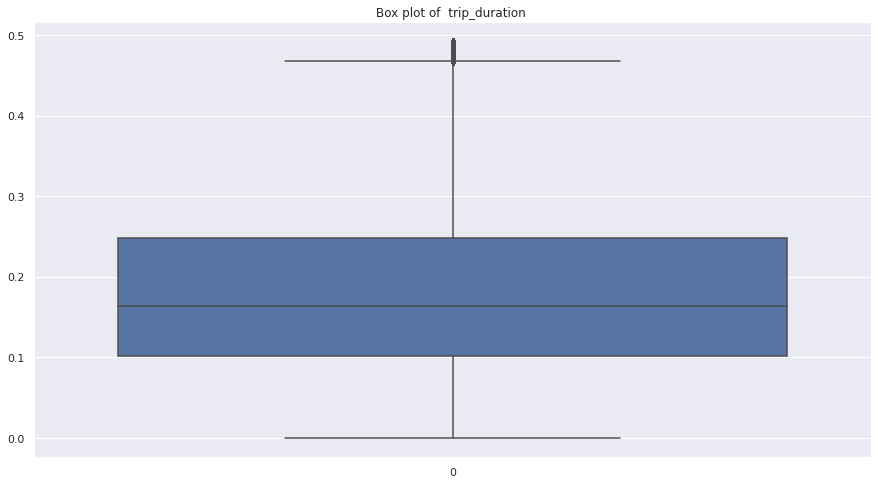

In [ ]:
#remove the outlier present in trip_duration

plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=df['trip_duration_hour'], orient="v")

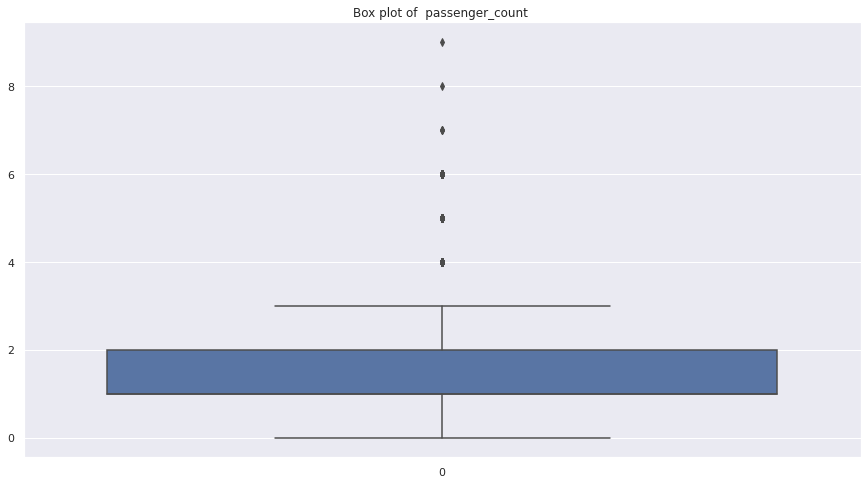

In [ ]:
#remove the outlier present in passenger_count

plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=df['passenger_count'], orient="v")

In [ ]:
percentile_q1_passenger_count = np.percentile(df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [ ]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
df=df[df['passenger_count']>lower_limit_outlier_passenger_count]
df=df[df['passenger_count']<upper_limit_outlier_passenger_count]

In [ ]:
df.shape

(1142750, 15)

Linear Regression

In [ ]:
features=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
     'distance', 'pickup_day', 'pickup_month',
       'pickup_weekday', 'pickup_hour', 'drop_hour']

newdata=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'distance', 'pickup_day', 'pickup_month',
       'pickup_weekday', 'pickup_hour', 'drop_hour', 'trip_duration_hour']
trip_df=df[newdata]

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = df[features].apply(zscore)[:100000]
y=df['trip_duration_hour'][:100000]
X[:5]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day,pickup_month,pickup_weekday,pickup_hour,drop_hour
0,1.026272,-0.473505,-0.037646,0.555484,0.183838,0.423402,-0.072749,-0.506317,-0.169958,-0.297565,-1.560592,0.526371,0.520884
1,-0.974401,-0.473505,-0.012915,-0.532213,-0.308620,-0.752950,-0.072749,-0.311490,-0.399706,1.488308,1.507477,-2.138749,-2.117090
3,1.026272,-0.473505,-0.434109,-1.220711,-0.489302,-1.587247,-0.072749,-0.514582,-1.088951,0.297726,-0.537902,0.839915,0.831234
4,1.026272,-0.473505,0.091760,1.491328,0.066653,1.001092,-0.072749,-0.703014,1.208533,-0.297565,0.996132,-0.100716,-0.099816
7,1.026272,-0.473505,0.145453,1.660556,0.779574,0.251202,-0.072749,2.169631,0.634162,0.893017,0.996132,-1.041347,-0.875690


In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(80000, 13) (80000,)
(20000, 13) (20000,)


In [ ]:
y_train.describe()

count    80000.000000
mean         0.183146
std          0.104862
min          0.000278
25%          0.101389
50%          0.163056
75%          0.248056
max          0.491111
Name: trip_duration_hour, dtype: float64

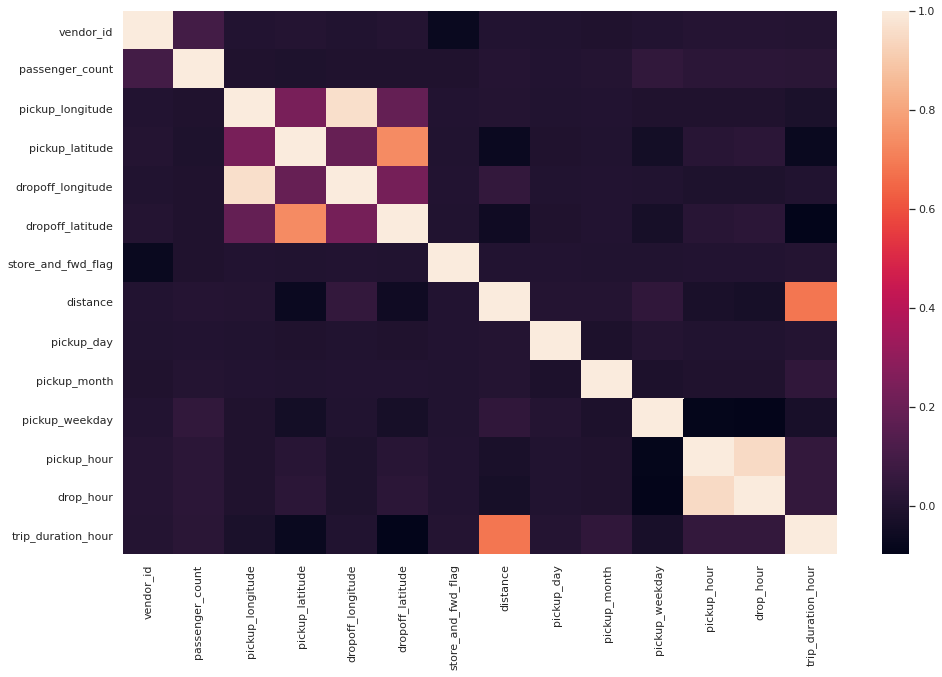

In [ ]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr())

In [ ]:
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

#Train set metrics
Ltr_MSE  = mean_squared_error((y_train),(y_pred_train))
print("MSE :" , Ltr_MSE)

Ltr_RMSE = np.sqrt(Ltr_MSE)

print("RMSE :" ,Ltr_RMSE)

Ltr_r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,Ltr_r2)
Ltr_ar2 = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 : ",Ltr_ar2)

MSE : 0.005593833612799668
RMSE : 0.07479193547970041
R2 : 0.4912768976236428
Adjusted R2 :  0.4911942156501613


In [ ]:
#Test set metrics
Lte_MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE :" , Lte_MSE)

Lte_RMSE = np.sqrt(Lte_MSE)
print("RMSE :" ,Lte_RMSE)

Lte_r2 = r2_score((y_test), (y_pred_test))
print("R2 :" ,Lte_r2)
Lte_ar2 = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Lte_ar2)

MSE : 0.005707464767717795
RMSE : 0.07554776480954149
R2 : 0.48444893820397483
Adjusted R2 :  0.4841135952737562


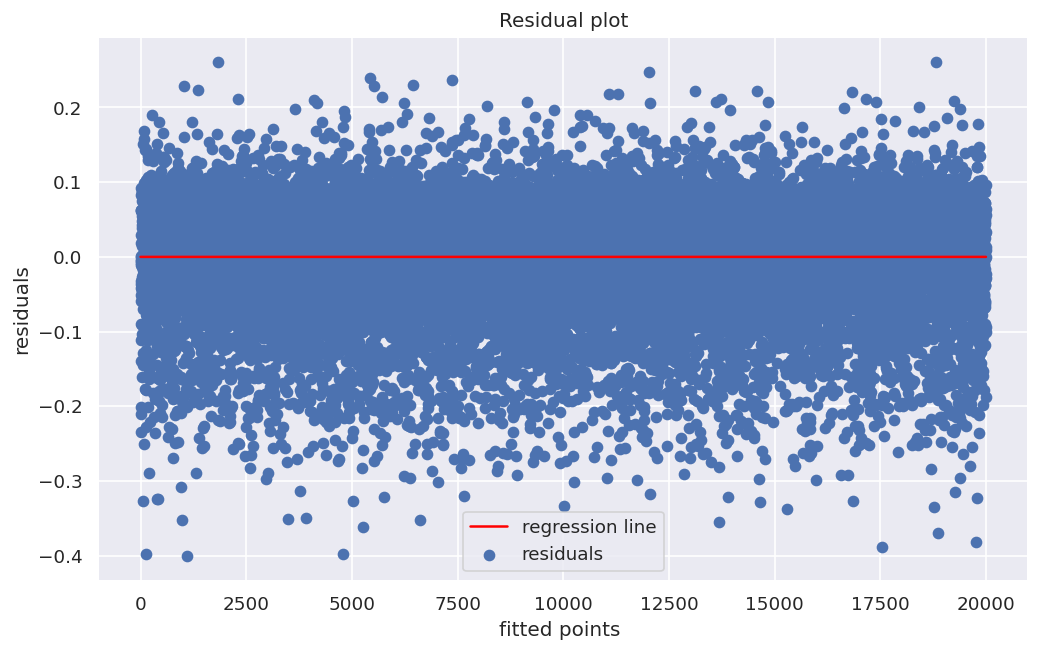

In [ ]:
#Heteroskedasticity
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
lasso_regressor.score(X_train, y_train)

0.491276897622972

In [ ]:
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)


Using  {'alpha': 1e-08}  the negative mean squared error is:  0.491017386326775


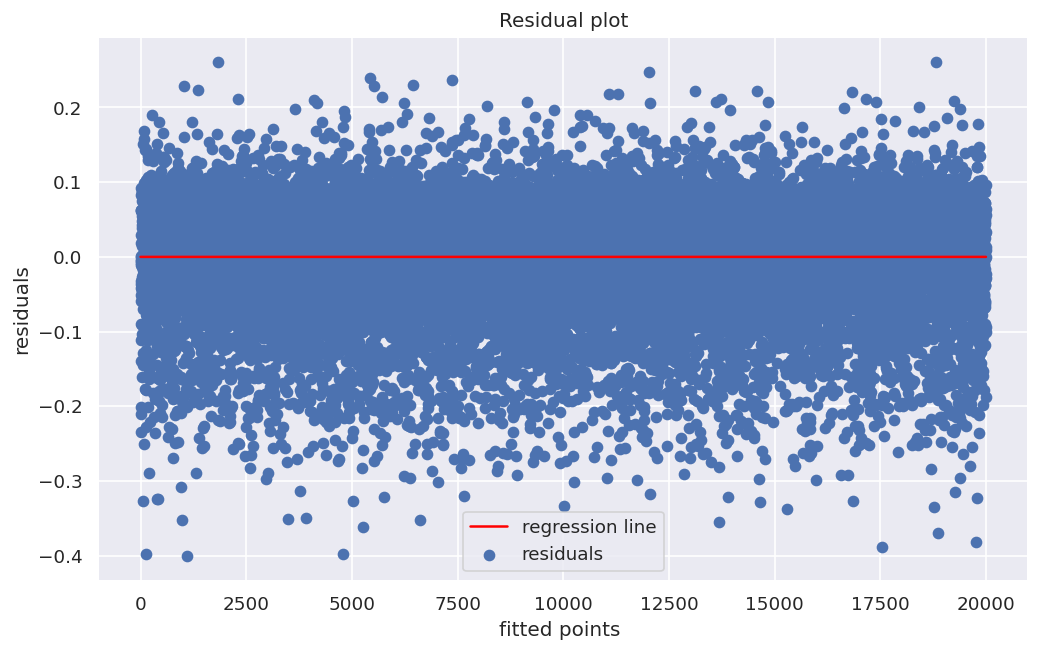

In [ ]:
#Heteroskedasticity
residuals=y_pred_lasso-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

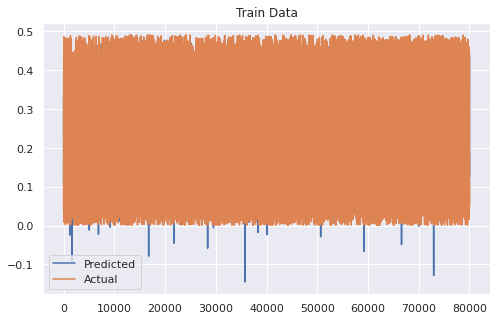

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_lasso_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.005593833612807045
Train RMSE : 0.07479193547974972
Train R2 : 0.491276897622972
Train Adjusted R2 :  0.4911942156494904


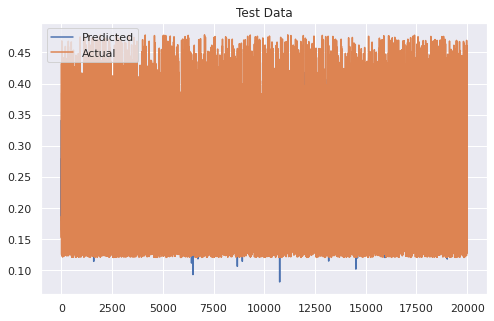

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.005707464668050171
Test RMSE : 0.07554776414990831
Test R2 : 0.48444894720687737
Test Adjusted R2 :  0.4841136042825147


Ridge

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
ridge_regressor.score(X_train, y_train)

0.4912763224108935

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 55}

Using  {'alpha': 55}  the negative mean squared error is:  0.491017386326775


In [ ]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train=ridge_regressor.predict(X_train)

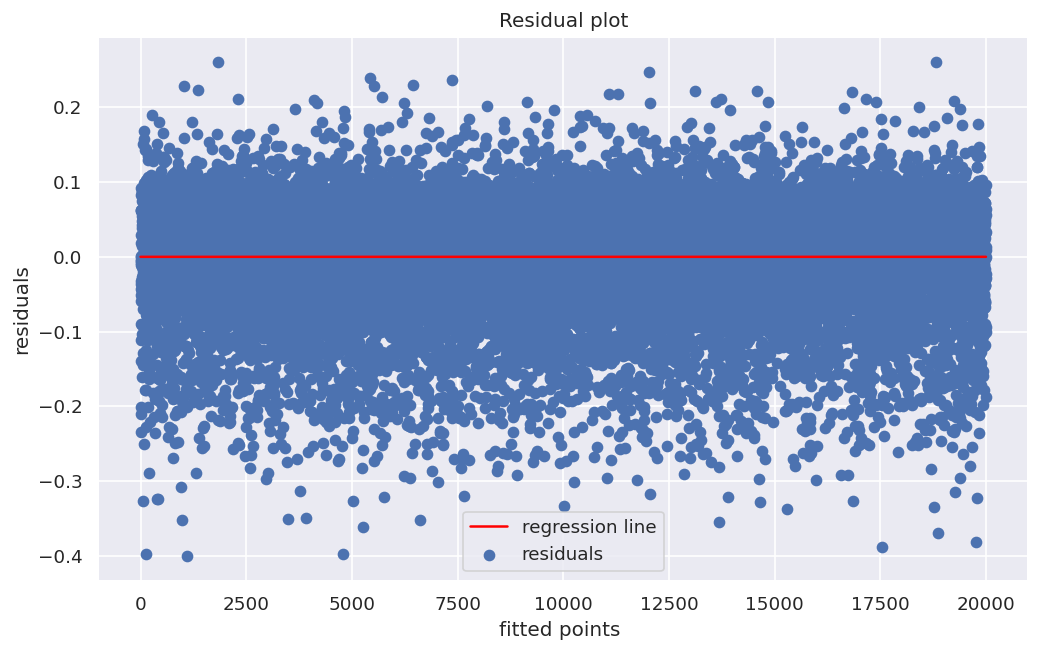

In [ ]:
#Heteroskedasticity
residuals=y_pred_ridge_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

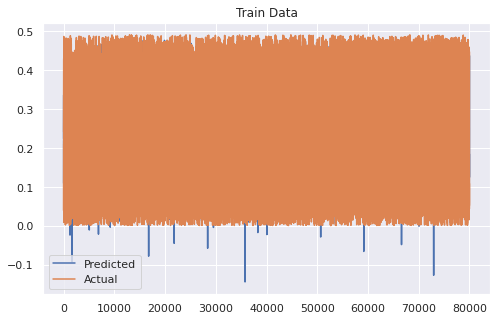

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_ridge_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.005593839937742249
Train RMSE : 0.07479197776327517
Train R2 : 0.4912763224108935
Train Adjusted R2 :  0.49119364034392354


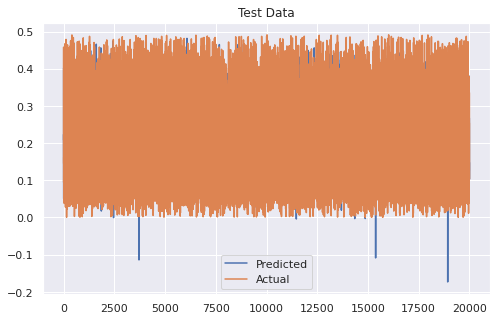

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Test Data")
plt.plot(y_pred_ridge_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.005707473675190169
Test RMSE : 0.07554782376210561
Test R2 : 0.48444813359859795
Test Adjusted R2 :  0.4841127901450195


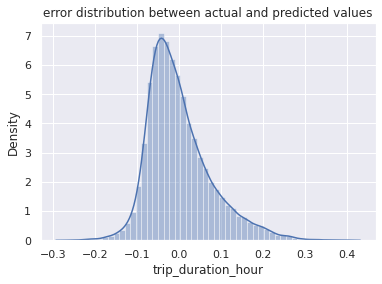

In [ ]:
sns.distplot(y_test - y_pred_ridge_test ).set_title("error distribution between actual and predicted values")
plt.show()

In [ ]:
# Gradient Boosting
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  24.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  24.8s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  24.6s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  29.3s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  29.2s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  29.0s
[CV] max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100, total=  24.2s
[CV] max_depth=5, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 47.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...ge=None,
                    

In [ ]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
y_preds_gb = gb_optimal_model.predict(X_test)
y_pred_gb_train=gb_optimal_model.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_train, y_pred_gb_train)
print("Train MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Train RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_gb_train)
print("Train R2 :" ,r2)
print("Train Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_gb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

Train MSE : 0.002133436656288374
Train RMSE : 0.04618914002542561
Train R2 : 0.8059776908581903
Train Adjusted R2 :  0.8059461567144796


In [ ]:
MSE  = mean_squared_error(y_test, y_preds_gb)
print("Test MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE :" ,RMSE)

r2 = r2_score(y_test, y_preds_gb)
print("Test R2 :" ,r2)
print("Test Adjusted R2 : ",1-(1-r2_score((y_test), (y_preds_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Test MSE : 0.0030998029392038263
Test RMSE : 0.0556758739419852
Test R2 : 0.7199970982380682
Test Adjusted R2 :  0.7198149688613593


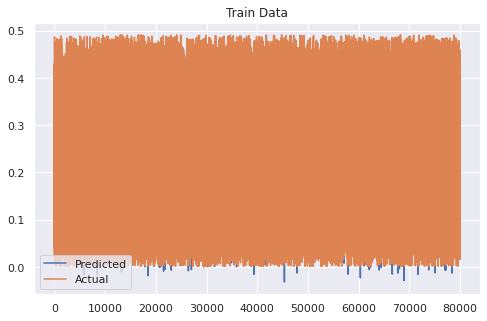

In [ ]:

plt.figure(figsize=(8,5))
plt.title('Train Data')
plt.plot(y_pred_gb_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()


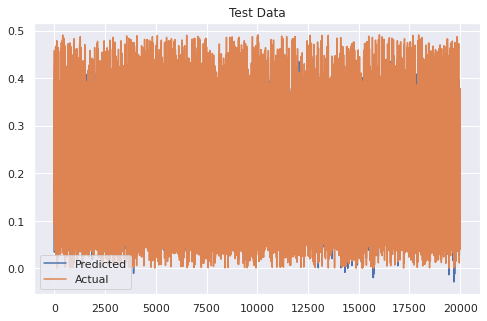

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_preds_gb)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()